<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Naser Kazemi
### Student Number : 99102059
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feature
3.   Change class labels to 1 and -1
4.   Do train-test split

In [2]:
#TODO

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# separate the features and the labels
X = df.drop('target', axis=1)
y = df['target']

# change the labels to 1 and -1
y = y.replace(0, -1)

# split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Adaboost Algorithm Implementation (40 points)

In [45]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    return np.sum(w[y != y_pred]) / np.sum(w)
    

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return 0.5 * np.log((1-error)/error)
    

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    return w * np.exp(-alpha * y * y_pred)

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                #TODO
                w = np.ones(len(X)) / len(X)
                 
            else:
                #TODO
                w = update_weights(w, self.alphas[m-1], y, y_pred)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            #TODO
            weak_classifier = DecisionTreeClassifier(max_depth=1)
            weak_classifier.fit(X, y, sample_weight=w)
            y_pred = weak_classifier.predict(X)
            self.G_M.append(weak_classifier)
            


            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            #TODO
            self.training_errors.append(calculate_error(y, y_pred, w))
            if self.training_errors[m] > 0.5:
                self.M = m
                return
            

            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            #TODO
            self.alphas.append(calculate_alpha(self.training_errors[m]))
            
        



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [51]:
#TODO : Fit model
model = AdaBoost()
model.fit(X_train, y_train, M=100)


#TODO : Predict on test data
y_pred = model.predict(X_test)



#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

Accuracy:  0.8341463414634146
Precision:  0.8165137614678899
Recall:  0.8640776699029126
F1-score:  0.839622641509434


In [52]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
sklearn_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100)
sklearn_model.fit(X_train, y_train)
y_pred = sklearn_model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

Accuracy:  0.8926829268292683
Precision:  0.9175257731958762
Recall:  0.8640776699029126
F1-score:  0.89


### Early Stopping (15 points)

In [59]:
#TODO : Calculate validation error for different number of estimators 

M = 200
training_errors = []
validation_errors = []
for m in range(1, M+1):
    model = AdaBoost()
    model.fit(X_train, y_train, m)
    y_pred = model.predict(X_train)
    training_errors.append(1 - accuracy_score(y_train, y_pred))
    y_pred = model.predict(X_test)
    validation_errors.append(1 - accuracy_score(y_test, y_pred))

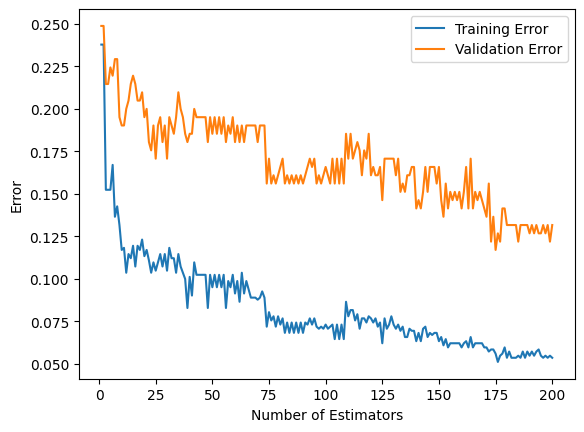

In [60]:
#TODO : Plot validation error versus number of estimators figure.
plt.plot(range(1, M+1), training_errors, label='Training Error')
plt.plot(range(1, M+1), validation_errors, label='Validation Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()
plt.show()

In [61]:
#TODO : Print the best number for estimators and minimum value for validation error.
print('Best number of estimators: ', np.argmin(validation_errors) + 1)
print('Minimum validation error: ', np.min(validation_errors))

Best number of estimators:  175
Minimum validation error:  0.11707317073170731


### Weighted Error (10 points)

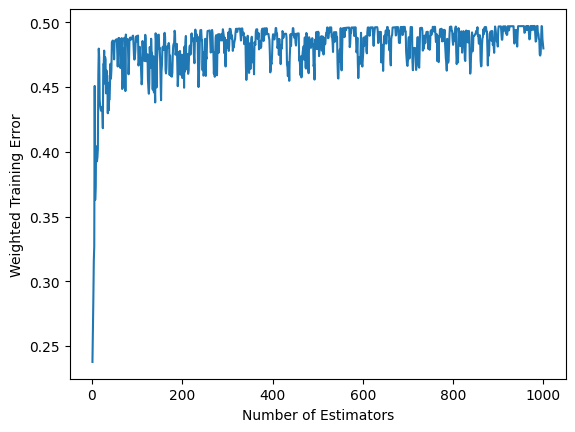

In [63]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.

model = AdaBoost()
model.fit(X_train, y_train, M=1000)
plt.plot(range(1, 1001), model.training_errors)
plt.xlabel('Number of Estimators')
plt.ylabel('Weighted Training Error')
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

The weighted error tends to increase as the number of estimators increase because the weight of the misclassified samples increases as the number of estimators increases. This means that the misclassified samples have a higher weight and the model will be more sensitive to them. Therefore, the model will be more likely to misclassify them in the next iteration.
